In [146]:
import kaggle
import pandas as pd
import numpy as np
import pyodbc
from sqlalchemy import create_engine

### Model of the Database

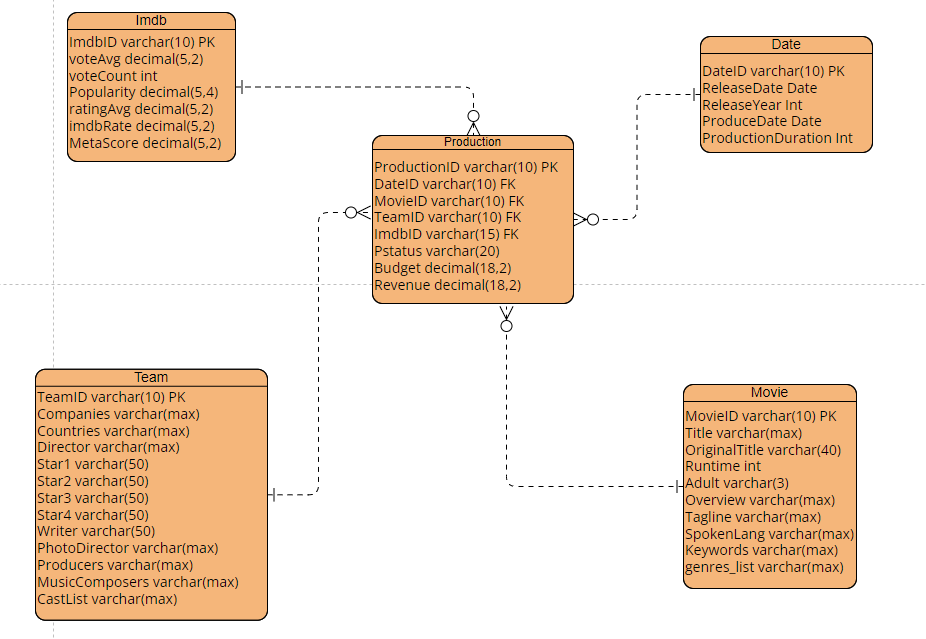

### Extract the file using Kaggle API

Source of the file: https://www.kaggle.com/datasets/shubhamchandra235/imdb-and-tmdb-movie-metadata-big-dataset-1m

In [147]:
# file = "shubhamchandra235/imdb-and-tmdb-movie-metadata-big-dataset-1m"
# fileName = "IMDB TMDB Movie Metadata Big Dataset (1M).csv"
# filePath = "."
# kaggle.api.dataset_download_files(file, filePath, unzip=True)

In [148]:
data = pd.read_csv("IMDB TMDB Movie Metadata Big Dataset (1M).csv")

In [149]:
data.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,Star3,Star4,Writer,Director_of_Photography,Producers,Music_Composer,genres_list,Cast_list,overview_sentiment,all_combined_keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Elliot Page,Ken Watanabe,Christopher Nolan,Wally Pfister,"Thomas Tull, Christopher Nolan, Chris Brigham,...",Hans Zimmer,"['Action', 'Science Fiction', 'Adventure']","['Tim Kelleher', 'Silvie Laguna', 'Natasha Bea...",-0.011111,"['s', 'philosophy', 'skilled', 'kidnapping', '..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Jessica Chastain,Mackenzie Foy,Jonathan Nolan,Hoyte van Hoytema,"Jake Myers, Emma Thomas, Jordan Goldberg, Thom...",Hans Zimmer,"['Adventure', 'Drama', 'Science Fiction']","['Jeff Hephner', 'William Devane', 'Elyes Gabe...",0.045455,"['thoughtful', 'use', 'scientist', 'quantum me..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,Aaron Eckhart,Michael Caine,Jonathan Nolan,Wally Pfister,"Kevin De La Noy, Thomas Tull, Christopher Nola...","Hans Zimmer, James Newton Howard","['Drama', 'Action', 'Crime', 'Thriller']","['Tommy Lister Jr.', 'Edison Chen', 'Beatrice ...",0.025000,"['reign', 'harvey', 'proves', 'partnership', '..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Sigourney Weaver,Michelle Rodriguez,James Cameron,Mauro Fiore,"Jon Landau, Colin Wilson, Laeta Kalogridis, Ja...",James Horner,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Carvon Futrell', 'Joel David Moore', 'Jon Cu...",0.041667,"['space war', 'civilization', 'society', 'mari..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,Scarlett Johansson,Jeremy Renner,Sydney Newman,NaN,NaN,NaN,"['Science Fiction', 'Action', 'Adventure']","['Haneyuri', 'Nako Mizusawa', 'Marin', 'Rikako...",0.025000,"['s', 'world', 'begins', 'e', 'global safety',..."


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072255 entries, 0 to 1072254
Data columns (total 42 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1072255 non-null  int64  
 1   title                    1072255 non-null  object 
 2   vote_average             1072255 non-null  float64
 3   vote_count               1072255 non-null  int64  
 4   status                   1072255 non-null  object 
 5   release_date             921699 non-null   object 
 6   revenue                  1072255 non-null  int64  
 7   runtime                  1072255 non-null  int64  
 8   adult                    1072255 non-null  bool   
 9   backdrop_path            292826 non-null   object 
 10  budget                   1072255 non-null  int64  
 11  homepage                 115519 non-null   object 
 12  imdb_id                  589364 non-null   object 
 13  original_language        1072255 non-null 

In [151]:
# Drop irrelevant columns
data = data.drop(["backdrop_path","poster_path","homepage","Poster_Link","overview_sentiment","all_combined_keywords"], axis=1)

## Simple Transform process
- Remove duplicate IDs
- Convert revenue and budget to 2 decimal places (float)
- Create random 5 digit number for IDs
- Convert value in "adult" column to T (True) and F(False)
- Create a production date (assuming the movies takes 3 years to produce)

In [152]:
data = data.drop_duplicates(subset=["id"])

In [153]:
# Convert data types
data["revenue"] = data["revenue"].astype(float).round(2)
data["budget"] = data["budget"].astype(float).round(2)

In [154]:
# Create random 5 digit IDs 
data["date_id"] = np.random.choice(np.arange(0,1100000), size=len(data), replace=False)
data["movie_id"] = np.random.choice(np.arange(0,1100000), size=len(data), replace=False)
data["team_id"] = np.random.choice(np.arange(0,1100000), size=len(data), replace=False)
data["imdb_id"] = np.random.choice(np.arange(0,1100000), size=len(data), replace=False)

In [155]:
# Convert True and False values to T and F respectively
data["adult"] = data["adult"].replace({True:'T', False:'F'})

In [156]:
# Create Production Date
data["release_date"] = pd.to_datetime(data["release_date"])
data["production_date"] = data["release_date"] + pd.DateOffset(years=3)
data["production_duration"] = 3

In [157]:
data.iloc[2]

id                                                                       155
title                                                        The Dark Knight
vote_average                                                           8.512
vote_count                                                             30619
status                                                              Released
release_date                                             2008-07-16 00:00:00
revenue                                                         1004558444.0
runtime                                                                  152
adult                                                                      F
budget                                                           185000000.0
imdb_id                                                               755745
original_language                                                         en
original_title                                               The Dark Knight

### Remodel the dataframe to insert into our database for each table

#### Date Dimension

In [158]:
date_dimension = data[["date_id","release_date","release_year","production_date","production_duration"]]

date_dimension.rename(columns={
    "date_id":"DateID",
    "release_date":"ReleaseDate",
    "release_year":"ReleaseYear",
    "production_date":"ProduceDate",
    "production_duration":"ProductionDuration"
}, inplace=True)

date_dimension

C:\Users\user\AppData\Local\Temp\ipykernel_5032\3712318964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_dimension.rename(columns={


,DateID,ReleaseDate,ReleaseYear,ProduceDate,ProductionDuration
0,387155,2010-07-15,2010.0,2013-07-15,3
1,26165,2014-11-05,2014.0,2017-11-05,3
2,551189,2008-07-16,2008.0,2011-07-16,3
3,285731,2009-12-15,2009.0,2012-12-15,3
4,1039169,2012-04-25,2012.0,2015-04-25,3
...,...,...,...,...,...
1072250,846341,2017-07-13,2017.0,2020-07-13,3
1072251,1059419,2019-06-12,2019.0,2022-06-12,3
1072252,432347,2020-06-15,2020.0,2023-06-15,3
1072253,215970,1964-02-02,1964.0,1967-02-02,3


#### Team Dimension

In [159]:
team_dimension = data[["team_id","production_companies","production_countries","Director","Star1","Star2","Star3","Star4","Writer","Director_of_Photography","Producers","Music_Composer","Cast_list"]]

team_dimension.rename(columns={
    "team_id":"TeamID",
    "production_companies":"Companies",
    "production_countries":"Countries",
    "Director_of_Photography":"PhotoDirector",
    "Music_Composer":"MusicComposers",
    "Cast_list":"CastList"
},inplace=True)

team_dimension

C:\Users\user\AppData\Local\Temp\ipykernel_5032\2487099215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_dimension.rename(columns={


,TeamID,Companies,Countries,Director,Star1,Star2,Star3,Star4,Writer,PhotoDirector,Producers,MusicComposers,CastList
0,942720,"Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America",Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Christopher Nolan,Wally Pfister,"Thomas Tull, Christopher Nolan, Chris Brigham,...",Hans Zimmer,"['Tim Kelleher', 'Silvie Laguna', 'Natasha Bea..."
1,814625,"Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",Christopher Nolan,Matthew McConaughey,Anne Hathaway,Jessica Chastain,Mackenzie Foy,Jonathan Nolan,Hoyte van Hoytema,"Jake Myers, Emma Thomas, Jordan Goldberg, Thom...",Hans Zimmer,"['Jeff Hephner', 'William Devane', 'Elyes Gabe..."
2,1063637,"DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America",Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Jonathan Nolan,Wally Pfister,"Kevin De La Noy, Thomas Tull, Christopher Nola...","Hans Zimmer, James Newton Howard","['Tommy Lister Jr.', 'Edison Chen', 'Beatrice ..."
3,467137,"Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom",James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,James Cameron,Mauro Fiore,"Jon Landau, Colin Wilson, Laeta Kalogridis, Ja...",James Horner,"['Carvon Futrell', 'Joel David Moore', 'Jon Cu..."
4,970406,Marvel Studios,United States of America,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner,Sydney Newman,NaN,NaN,NaN,"['Haneyuri', 'Nako Mizusawa', 'Marin', 'Rikako..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072250,965285,NaN,NaN,Lin Jun-ying,NaN,NaN,NaN,NaN,NaN,NaN,Hou Hsiao-hsien,NaN,"['Chu Tien-wen', 'Chu Tʽien-hsin']"
1072251,848860,PWSFTviT,Poland,Peter Bisuito,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Robbie', 'Suzanne Sole', 'Peter Bisuito', 'R..."
1072252,982859,Korea National University of Arts,South Korea,Janna Ji Wonders,NaN,NaN,NaN,NaN,"Zoran Drvenkar, Sarah Bräuer, Janna Ji Wonders",NaN,NaN,NaN,"['Jude Thomas', 'Robyn Miller', 'Spencer Kenne..."
1072253,912837,Spentzos Films,Greece,Adam Dalupang,NaN,NaN,NaN,NaN,"Mauel Opleda, Adam Dalupang",Alec Setiota,Adam Dalupang,NaN,"['Matthew Pineda', 'Adam Dalupang', 'Julie Say..."


#### Movie Dimension

In [160]:
movie_dimension = data[["movie_id","title","original_title","runtime","adult","overview","tagline","spoken_languages","keywords","genres_list"]]

movie_dimension.rename(columns={
    "movie_id":"MovieID",
    "title":"Title",
    "original_title":"OriginalTitle",
    "runtime":"Runtime",
    "adult":"Adult",
    "overview":"Overview",
    "tagline":"Tagline",
    "spoken_languages":"SpokenLang",
    "keywords":"Keywords",
    "genres_list":"GenresList"
}, inplace=True)

movie_dimension

C:\Users\user\AppData\Local\Temp\ipykernel_5032\4101163770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_dimension.rename(columns={


,MovieID,Title,OriginalTitle,Runtime,Adult,Overview,Tagline,SpokenLang,Keywords,GenresList
0,220919,Inception,Inception,148,F,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"English, French, Japanese, Swahili","['rescue', 'mission', 'dream', 'airplane', 'pa...","['Action', 'Science Fiction', 'Adventure']"
1,1008542,Interstellar,Interstellar,169,F,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,English,"['rescue', 'future', 'spacecraft', 'race again...","['Adventure', 'Drama', 'Science Fiction']"
2,184446,The Dark Knight,The Dark Knight,152,F,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"English, Mandarin","['joker', 'sadism', 'chaos', 'secret identity'...","['Drama', 'Action', 'Crime', 'Thriller']"
3,767961,Avatar,Avatar,162,F,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"English, Spanish","['future', 'society', 'culture clash', 'space ...","['Action', 'Adventure', 'Fantasy', 'Science Fi..."
4,376889,The Avengers,The Avengers,143,F,When an unexpected enemy emerges and threatens...,Some assembly required.,"English, Hindi, Russian","['new york city', 'superhero', 'shield', 'base...","['Science Fiction', 'Action', 'Adventure']"
...,...,...,...,...,...,...,...,...,...,...
1072250,784670,Affability,وَنَسْ,23,F,Mahmoud and Nabila are married couple in their...,NaN,Arabic,[],['Unknown']
1072251,1032613,Such a Beautiful Town,Takie piekne miasto,8,F,"In order to confront her unfaithful partner, a...",NaN,Polish,[],"['Animation', 'Drama']"
1072252,954534,Sura,Sura,6,F,A high school student. My best friend is pregn...,NaN,NaN,[],"['Animation', 'Drama']"
1072253,949483,Ανεμοστρόβιλος,Ανεμοστρόβιλος,0,F,NaN,NaN,Greek,[],['Drama']


#### Imdb Dimension

In [161]:
imdb_dimension = data[["imdb_id","vote_average","vote_count","popularity","AverageRating","IMDB_Rating","Meta_score"]]

imdb_dimension.rename(columns={
    "imdb_id":"ImdbID",
    "vote_average":"voteAvg",
    "vote_count":"voteCount",
    "popularity":"Popularity",
    "AverageRating":"ratingAvg",
    "IMDB_Rating":"imdbRate",
    "Meta_score":"MetaScore"
}, inplace=True)

imdb_dimension

C:\Users\user\AppData\Local\Temp\ipykernel_5032\1123032539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_dimension.rename(columns={


,ImdbID,voteAvg,voteCount,Popularity,ratingAvg,imdbRate,MetaScore
0,1024012,8.364,34495,83.952,8.8,8.8,74.0
1,379874,8.417,32571,140.241,8.7,8.6,74.0
2,755745,8.512,30619,130.643,9.0,9.0,84.0
3,1076739,7.573,29815,79.932,7.9,7.8,83.0
4,179046,7.710,29166,98.082,8.0,8.0,69.0
...,...,...,...,...,...,...,...
1072250,724482,0.000,0,0.600,NaN,NaN,NaN
1072251,313717,0.000,0,0.600,NaN,NaN,NaN
1072252,671395,0.000,0,0.600,NaN,NaN,NaN
1072253,389055,0.000,0,0.600,NaN,NaN,NaN


#### Production Fact Table

In [177]:
production_fact = pd.concat([data["id"], date_dimension["DateID"], movie_dimension["MovieID"], team_dimension["TeamID"], imdb_dimension["ImdbID"], data["status"], data["budget"], data["revenue"]], axis=1)

production_fact.rename(columns={
    "id":"ProductionID",
    "status":"Pstatus",
    "budget":"Budget",
    "revenue":"Revenue"
}, inplace=True)

production_fact["Pstatus"].unique()

array(['Released', 'Planned', 'Post Production', 'In Production',
       'Rumored', 'Canceled'], dtype=object)

### Load the Data into Database

In [163]:
# Set the connection
Server = 'CyroxsPC'
Database = 'MovieDB'
Driver = 'ODBC Driver 17 for SQL Server'
conn_string = f'mssql://@{Server}/{Database}?driver={Driver}'
engine = create_engine(conn_string)

In [165]:
date_dimension.to_sql('D_Date', con=engine, if_exists='append',index=False)

-1

In [166]:
movie_dimension.to_sql('D_Movie', con=engine, if_exists='append',index=False)

-1

In [170]:
team_dimension.to_sql('D_Team', con=engine, if_exists='append',index=False)

-1

In [172]:
imdb_dimension.to_sql('D_Imdb', con=engine, if_exists='append',index=False)

-1

In [178]:
production_fact.to_sql('F_Production', con=engine, if_exists='append',index=False)

-1